In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
# renderer for jupyter notebook
pio.renderers.default='notebook'
# renderer for vs code
# pio.renderers.default='vscode'
# renderer for colab
# pio.renderers.default='colab'
pio.templates.default = "plotly_dark"
import numpy as np
import statsmodels.api as sm
import datetime
from plotly.subplots import make_subplots
from ipywidgets import widgets,Layout
import warnings
warnings.simplefilter(action='ignore')

In [2]:
rain=pd.read_csv(r'../data/processedfiles/rainfall-by-region.csv')
rain=rain.set_index('date',drop=False)
regions=list(rain.columns.values)[5:]
years=list(rain['year'].unique())
monsoon_list=[i for i in range(150,281)]
rain_monsoon=rain[rain['day-number'].isin(monsoon_list)]

In [3]:
# rain considered from Day number 150 to 280

### Plotting Functions

In [5]:
# dropdown widget
region = widgets.Dropdown(
    options=regions,
    value=regions[0], description='Region',layout=Layout(margin='20px 20px 20px 20px'))
container=widgets.HBox([region])

In [6]:
def plot_fig(id_r,title,x_axis,g,data,iterate_list):
    var={i.split()[0].lower():i for i  in regions}
    id_region=var[id_r]
    with g.batch_update():
        if len(iterate_list)!=0:
            for i in iterate_list:
                df = data[data['year'] == i]
                g.data[i-1957].y=df[id_region]
                g.data[i-1957].name=str(i)
                g.data[i-1957].x=df[x_axis]
        else:
            g.data[0].y=data[id_region]
            g.data[0].name=str(title)
            g.data[0].x=data[x_axis]

In [7]:
def initial_plot(x_axis,df,iterate_list,title,x_axis_title):
#     list_type=year
    traces=[]
    if len(iterate_list)==0:
        traces.append(go.Scatter(x=df[x_axis],y=df[regions[0]],name=regions[0]))
    else:
        for i in iterate_list:
            temp = df[df['year'] == i]
            traces.append(go.Scatter(x=temp[x_axis],y=temp[regions[0]],name=str(i)))
    layout = go.Layout(title=dict(text=title),xaxis=dict(title=x_axis_title,rangeslider=dict(visible=True)),yaxis=dict(title='Rainfall (inch)'))
    go.Layout()
    return go.FigureWidget(data=traces, layout=layout)

In [8]:
def response(change):
    val=region.value.split()[0].lower()
    plot_fig(val,region.value,'day-number',g,rain_monsoon,years)
    plot_fig(val,region.value,'month',g_mean_monthly_year,mean_monthly_year,years)
    plot_fig(val,region.value,'month',g_median_monthly_year,median_monthly_year,years)
    plot_fig(val,region.value,'year',g_mean_yearly,mean_yearly,[])
    plot_fig(val,region.value,'year',g_median_yearly,median_yearly,[])
    plot_fig(val,region.value,'day-number',g_mean_daily,mean_daily,[])
    plot_fig(val,region.value,'day-number',g_median_daily,median_daily,[])
    plot_fig(val,region.value,'day-number',g_mean_daily_monsoon,mean_daily_monsoon,[])
    plot_fig(val,region.value,'day-number',g_median_daily_monsoon,median_daily_monsoon,[])

In [9]:
region.observe(response,names='value')

### Rain observed in all classification daily basIs (only monsoon time)

In [10]:
g=initial_plot('day-number',rain_monsoon,years,'Rain observed on daily basis (monsoon time)','Date of year')
total_container=widgets.VBox([container,g])
display(total_container)

### Rain Observed in all classification Monthly basis (mean and median)

In [11]:
mean_monthly_year=rain.groupby(['year','month'],as_index=False)[regions].mean()
median_monthly_year=rain.groupby(['year','month'],as_index=False)[regions].median()

In [12]:
g_mean_monthly_year=initial_plot('month',mean_monthly_year,years,'Mean rain observed on monthly basis','Month')
g_median_monthly_year=initial_plot('month',median_monthly_year,years,'Median rain observed on monthly basis','Month')
total_container=widgets.VBox([container,g_mean_monthly_year,g_median_monthly_year])
display(total_container)

### Rain Observed in all classification Yearly basis (mean and median)

In [13]:
mean_yearly=rain.groupby(['year'],as_index=False)[regions].mean()
median_yearly=rain.groupby(['year'],as_index=False)[regions].median()

In [14]:
g_mean_yearly=initial_plot('year',mean_yearly,[],'Mean rain observed on yearly basis','Year')
g_median_yearly=initial_plot('year',median_yearly,[],'Median rain observed on yearly basis','Year')
display(region,g_mean_yearly,g_median_yearly)

Dropdown(description='Region', layout=Layout(margin='20px 20px 20px 20px'), options=('ajmer', 'alwar', 'banswa…

FigureWidget({
    'data': [{'name': 'ajmer',
              'type': 'scatter',
              'uid': 'b20f2609-…

FigureWidget({
    'data': [{'name': 'ajmer',
              'type': 'scatter',
              'uid': 'd1f6cc72-…

### Rainfall day wise distribution in all classification :full year (mean and median)

In [15]:
mean_daily=rain.groupby(['day-number'],as_index=False)[regions].mean()
median_daily=rain.groupby(['day-number'],as_index=False)[regions].median()

In [16]:
g_mean_daily=initial_plot('day-number',mean_daily,[],'Mean distribution of Rainfall','Day of year')
g_median_daily=initial_plot('day-number',median_daily,[],'Median distribution of Rainfall','Day of year')
display(region,g_mean_daily,g_median_daily)

Dropdown(description='Region', layout=Layout(margin='20px 20px 20px 20px'), options=('ajmer', 'alwar', 'banswa…

FigureWidget({
    'data': [{'name': 'ajmer',
              'type': 'scatter',
              'uid': '24d7cf50-…

FigureWidget({
    'data': [{'name': 'ajmer',
              'type': 'scatter',
              'uid': '121b048c-…

### Rainfall day wise distribution in all classification : monsoon time (mean and median)

In [17]:
mean_daily_monsoon=rain_monsoon.groupby(['day-number'],as_index=False)[regions].mean()
median_daily_monsoon=rain_monsoon.groupby(['day-number'],as_index=False)[regions].median()

In [18]:
g_mean_daily_monsoon=initial_plot('day-number',mean_daily_monsoon,[],'Mean distribution of Rainfall (monsoon time)','Day of year')
g_median_daily_monsoon=initial_plot('day-number',median_daily_monsoon,[],'Median distribution of Rainfall (monsoon time)','Day of year')
display(region,g_mean_daily_monsoon,g_median_daily_monsoon)

Dropdown(description='Region', layout=Layout(margin='20px 20px 20px 20px'), options=('ajmer', 'alwar', 'banswa…

FigureWidget({
    'data': [{'name': 'ajmer',
              'type': 'scatter',
              'uid': 'ba9f2479-…

FigureWidget({
    'data': [{'name': 'ajmer',
              'type': 'scatter',
              'uid': '9b9aec9e-…

### Outlier calculation in all classification: year/month/daily

In [21]:
rain_monsoon_year=rain_monsoon.groupby('year',as_index=False)[regions].sum()

In [22]:
rain_monsoon_year=rain_monsoon_year.replace(0,np.NaN)

In [23]:
fig=go.Figure()
for i in regions:
    fig.add_trace(go.Box(y=rain_monsoon_year[i],name=i))
fig.show()

In [24]:
fig=go.Figure()
for i in regions:
    fig.add_trace(go.Scatter(x=rain_monsoon_year['year'],y=rain_monsoon_year[i],mode='markers',name=i))
fig.show()

In [25]:
import statsmodels.stats.outliers_influence as inf

In [26]:
from yellowbrick.regressor import CooksDistance

ajmer


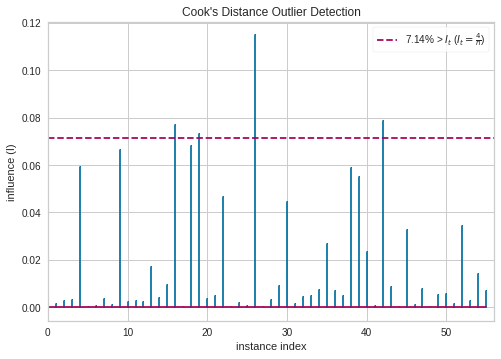

alwar


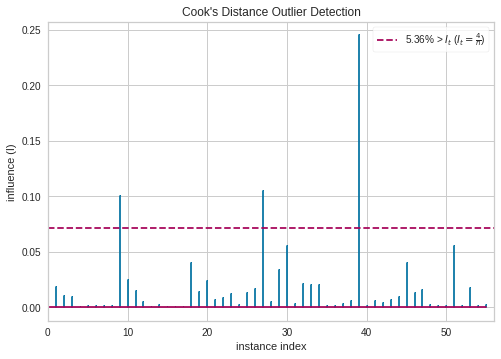

banswara


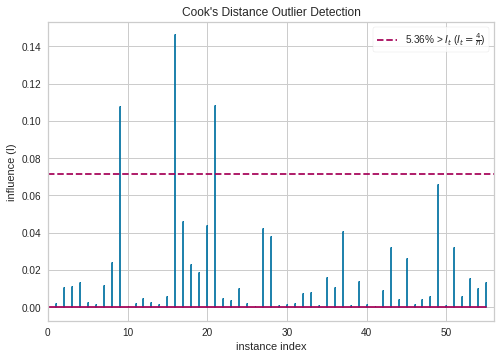

baran


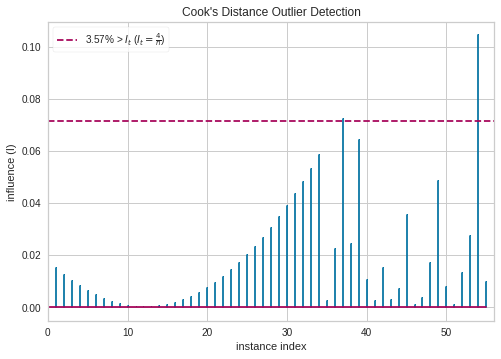

barmer


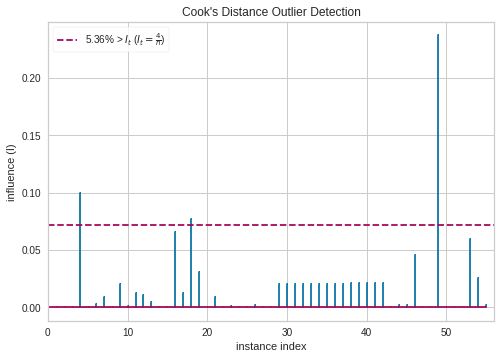

bharatpur


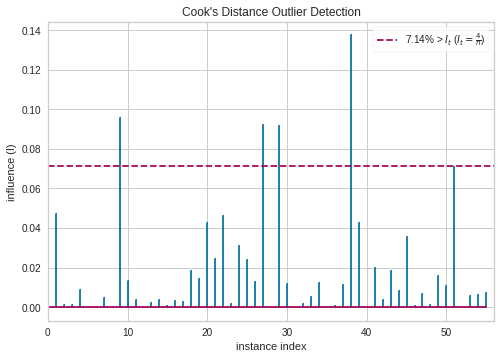

bhilwara


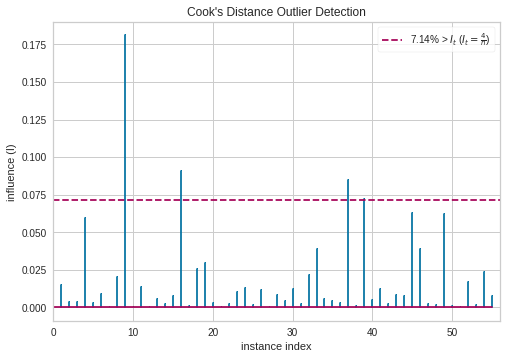

bikaner


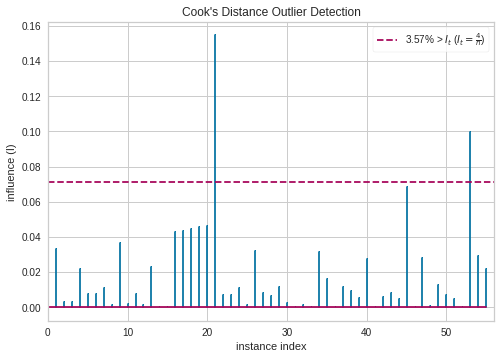

bundi


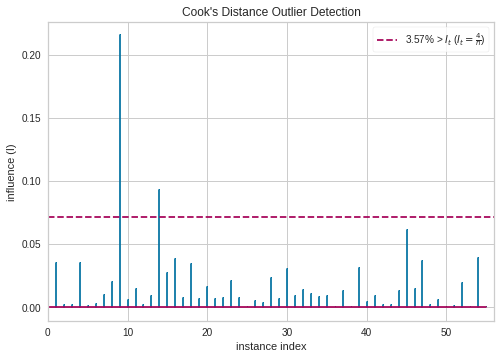

chittorgarh


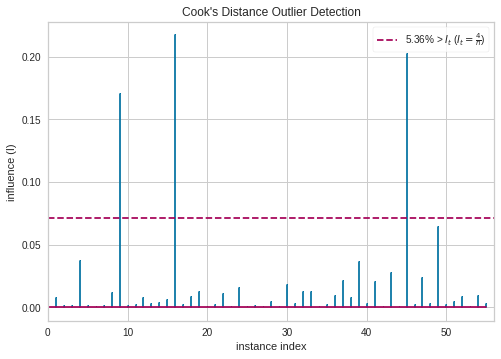

churu


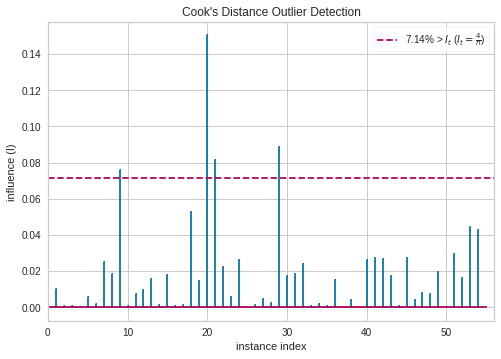

dausa


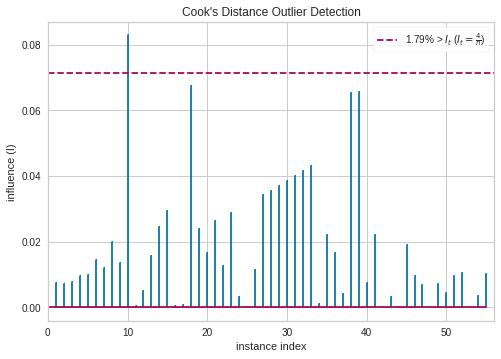

dholpur


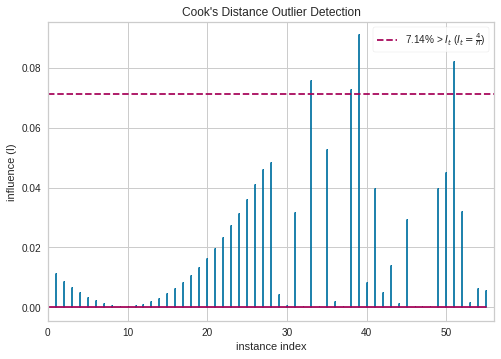

dungarpur


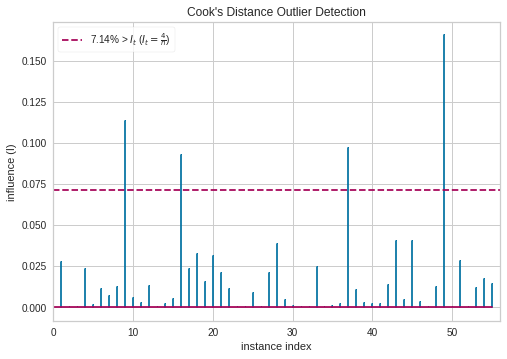

hanumangarh


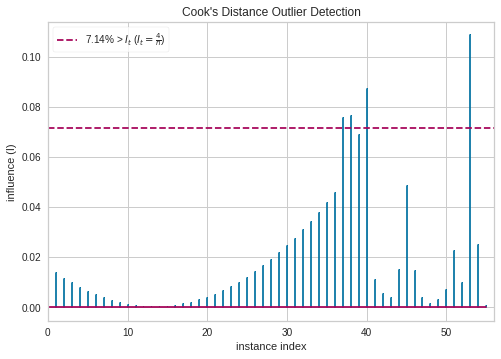

jaipur


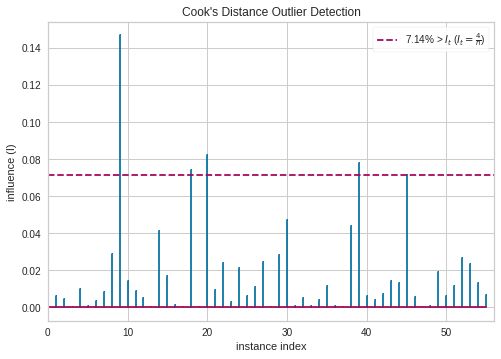

jaisalmer


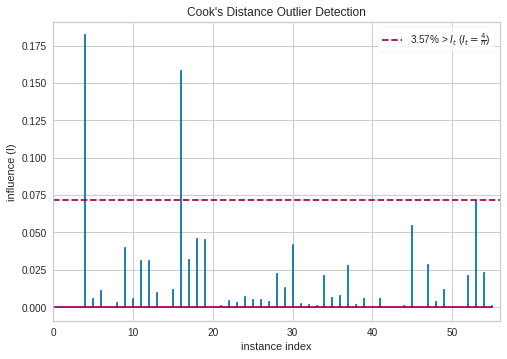

jalore


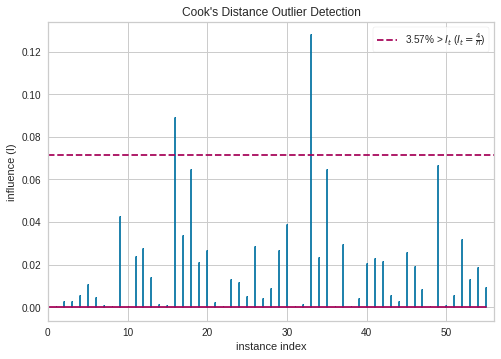

jhunjhunu


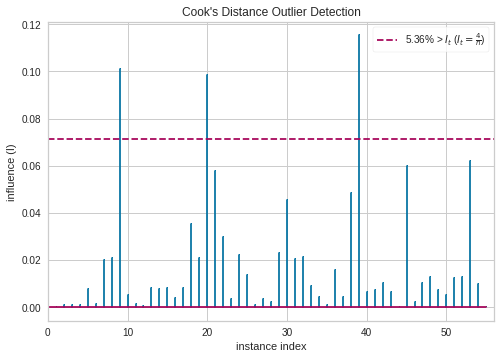

jodhpur


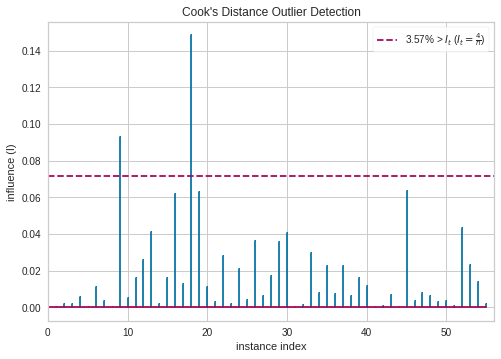

karoli


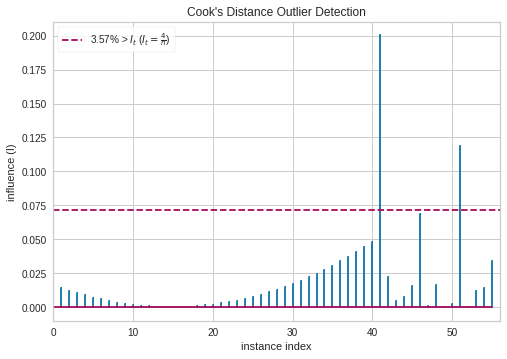

kota


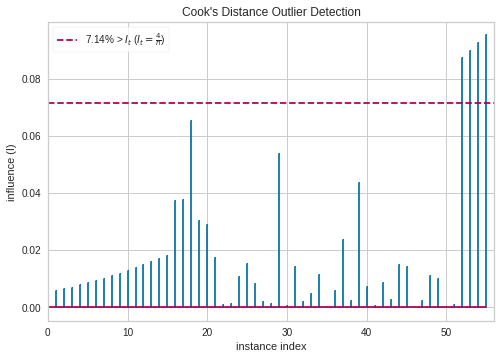

nagaur


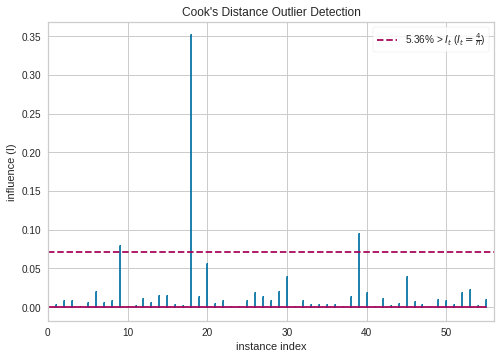

pali


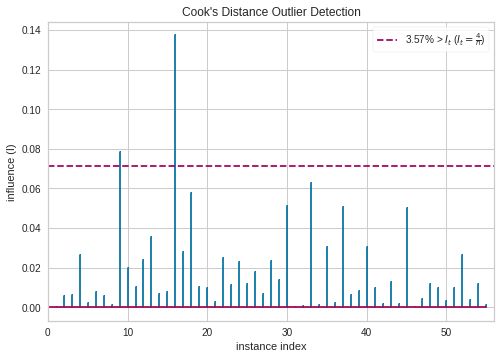

pratapgarh


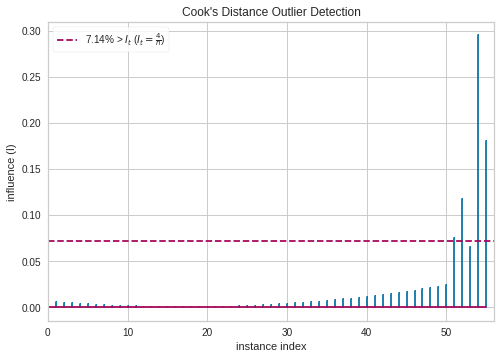

rajsamand


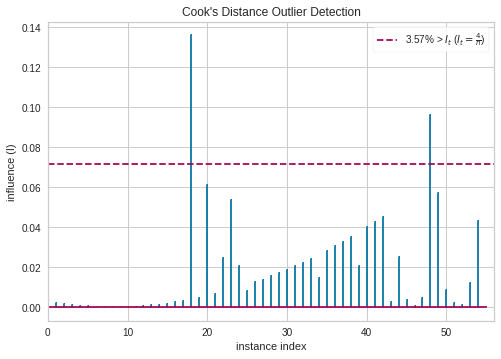

sawai madhopur


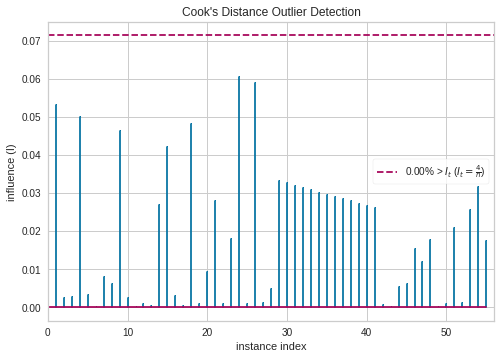

sikar


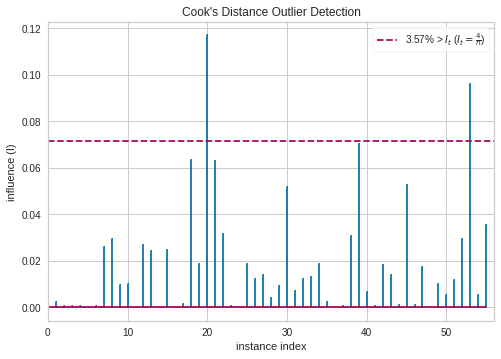

sirohi


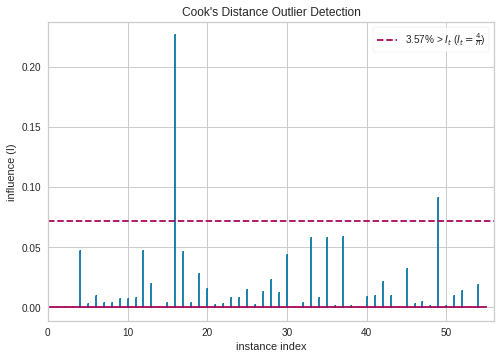

ganganagar


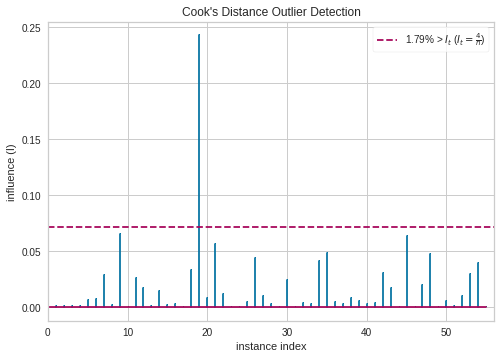

tonk


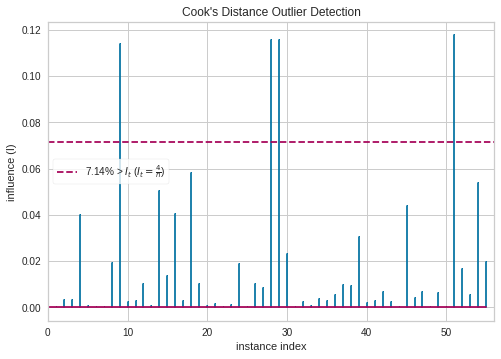

udaipur


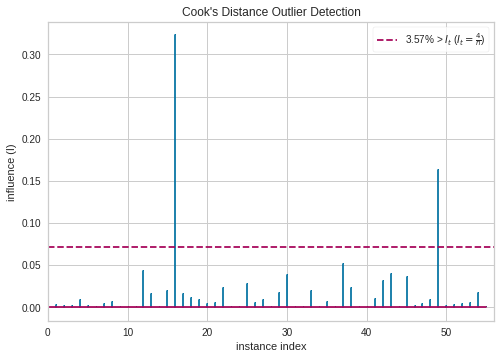

aw


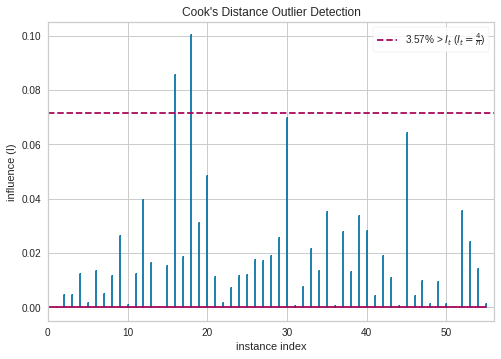

bshw


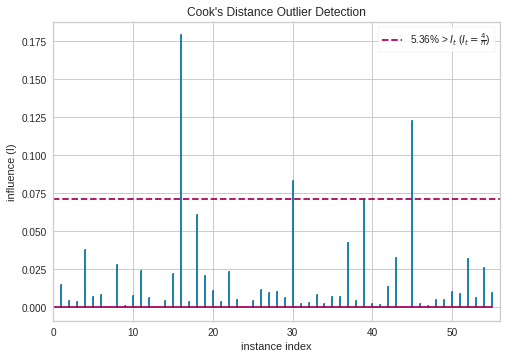

cwq


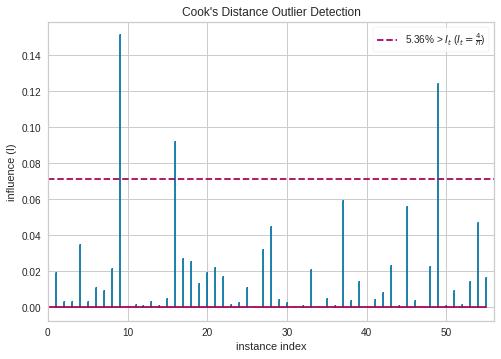

bwhw


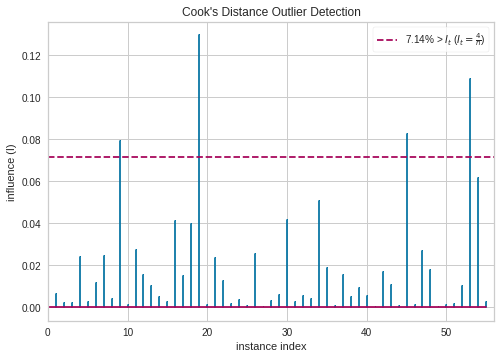

sub humid


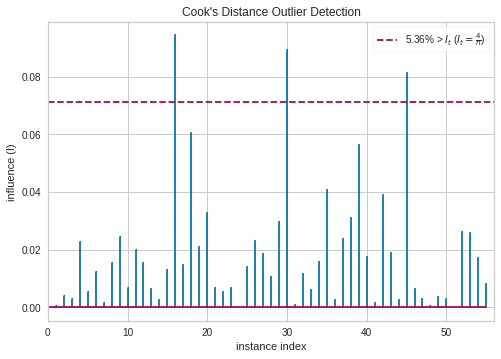

humid


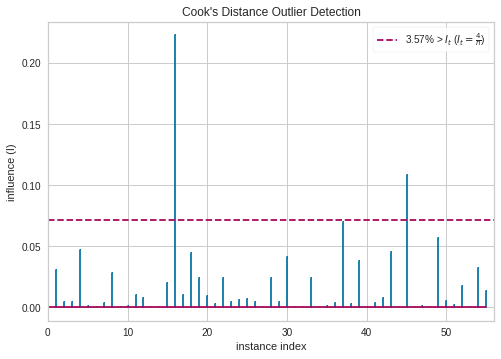

very humid


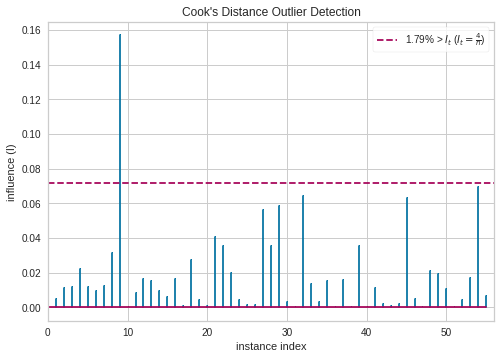

semi arid


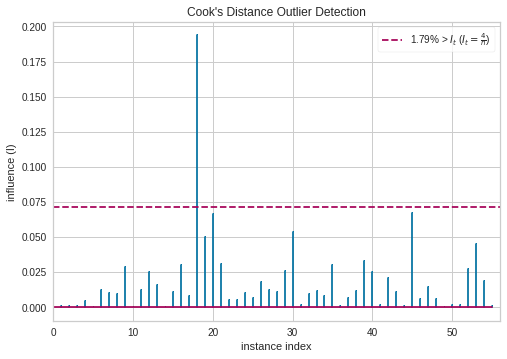

arid


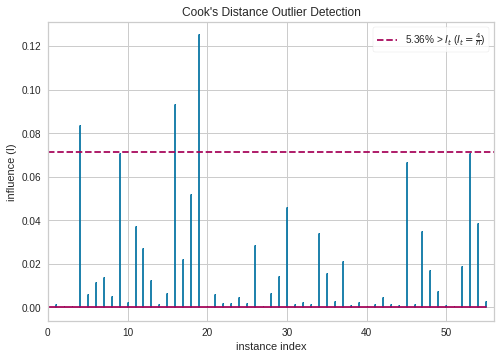

daw


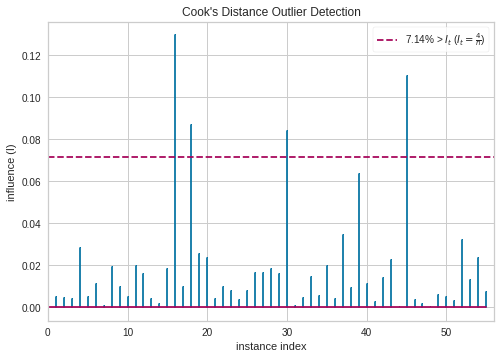

caw


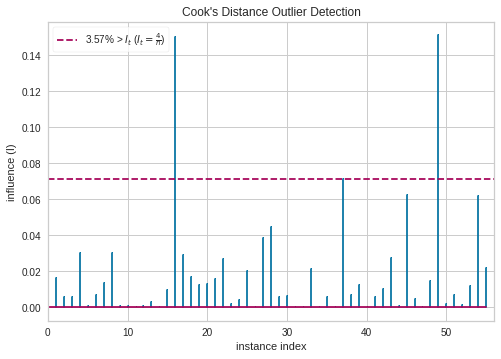

ead


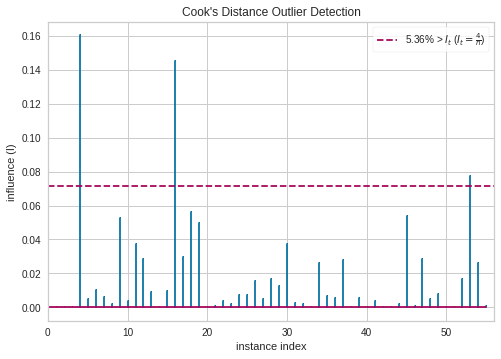

dbw


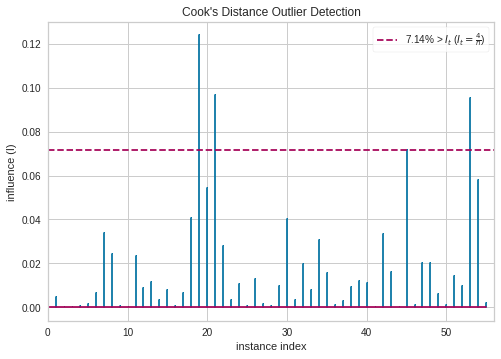

In [27]:
rain_monsoon_year.fillna(0,inplace=True)
for i in regions:
    print(i)
    vis=CooksDistance()
    vis.fit(rain_monsoon_year['year'].to_numpy().reshape(-1,1),rain_monsoon_year[i])
    vis.show()

In [82]:
rain_monsoon_month=rain_monsoon.groupby(['year','month'],as_index=False)[regions].sum()